# Importing required libraries

In [1]:
# Importing_required_Libraries
# Data_manipulation
import pandas as pd
# Numerical_computing
import numpy as np
# Data_visualization
import matplotlib.pyplot as plt
# Statistical_data_visualization
import seaborn as sns
# Machine_learning_toolkits
# Random_Forest_regressor_from_Scikit-learn
from sklearn.ensemble import RandomForestRegressor
# Metrics_for_model_evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error 
# For_splitting_dataset_and grid_search
from sklearn.model_selection import train_test_split, GridSearchCV
# Gradient_boosting_framework
import lightgbm as lgb
# Support_Vector_Regressor_and_Classifier_from_Scikit-learn
from sklearn.svm import SVR, SVC
# For_imputing_missing_values
from sklearn.preprocessing import StandardScaler
# Deep_learning_framework
import tensorflow as tf

# LOADING_DATASET(HOUSE PRICE)

In [2]:
#Loading_house_prediction_csv
house_data = pd.read_csv('house_price_dataset.csv')

In [3]:
#defining head of dataSet
house_data.head()

,SquareFeet,Bedrooms,Bathrooms,GarageSpaces,YearBuilt,LotSize,Neighborhood,IsRenovated,HasPool,HouseCondition,Price
0,4174,3,2,1,1962,9064.552592,Williamshire,1,1,2,1.007483e+07
1,4507,3,1,2,1956,2910.487922,Jacksonport,1,1,8,3.997346e+06
2,1860,4,2,1,1967,8543.220560,Marquezmouth,0,0,5,9.028734e+06
3,2294,5,2,2,1994,5877.089974,Moorebury,0,0,3,6.532843e+06
4,2130,4,2,1,1973,3159.660498,Davidhaven,1,1,6,3.761008e+06


In [4]:
#defining tail of dataSet
house_data.tail()

,SquareFeet,Bedrooms,Bathrooms,GarageSpaces,YearBuilt,LotSize,Neighborhood,IsRenovated,HasPool,HouseCondition,Price
19995,3227,4,3,0,2014,2156.380073,Thomasland,1,0,2,2.956088e+06
19996,4796,1,1,0,2013,7250.611958,Port Andrea,0,1,4,8.306814e+06
19997,1292,5,1,0,1998,1314.139196,Melaniechester,1,0,6,1.772426e+06
19998,1583,2,3,1,2020,8874.586375,West Frank,0,0,7,9.352644e+06
19999,3842,4,2,1,1984,8711.441219,Fergusonchester,0,0,2,9.697565e+06


# Summary of dataset(House Price Prediction)

In [5]:
#Discription_house_prediction_dataset
print(house_data.describe())


         SquareFeet      Bedrooms     Bathrooms  GarageSpaces     YearBuilt  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean    2997.250250      3.017950      2.000100      0.994250   1985.088750   
std     1153.744482      1.415708      0.812424      0.816303     20.762638   
min     1000.000000      1.000000      1.000000      0.000000   1950.000000   
25%     1992.000000      2.000000      1.000000      0.000000   1967.000000   
50%     2981.000000      3.000000      2.000000      1.000000   1985.000000   
75%     3999.000000      4.000000      3.000000      2.000000   2003.000000   
max     4999.000000      5.000000      3.000000      2.000000   2021.000000   

            LotSize   IsRenovated       HasPool  HouseCondition         Price  
count  20000.000000  20000.000000  20000.000000    20000.000000  2.000000e+04  
mean    5502.847514      0.494350      0.505400        5.472300  6.263106e+06  
std     2598.304951      0.499981      0.499983 

# Number of rows selected for modelling

In [6]:
#sampling
house_data_sample = house_data.sample(n=12000, random_state=42)

# DataSet Information

In [7]:
#Information of dataSet
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SquareFeet      20000 non-null  int64  
 1   Bedrooms        20000 non-null  int64  
 2   Bathrooms       20000 non-null  int64  
 3   GarageSpaces    20000 non-null  int64  
 4   YearBuilt       20000 non-null  int64  
 5   LotSize         20000 non-null  float64
 6   Neighborhood    20000 non-null  object 
 7   IsRenovated     20000 non-null  int64  
 8   HasPool         20000 non-null  int64  
 9   HouseCondition  20000 non-null  int64  
 10  Price           20000 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.7+ MB


# DATASET_SHAPE

In [8]:
# Check_the_shape_of_the_original_dataset
print("Actual dataset Shape:", house_data.shape)
# Check_the_shape_of_the_reduced_dataset
print("Reduced dataset shape:", house_data_sample.shape)


Actual dataset Shape: (20000, 11)
Reduced dataset shape: (12000, 11)


# "Data perprocessing: Data cleaning "
####        1.Removing Unnecessary Columns
####        2.Checking Null values
####        3.Removing Duplicates


In [9]:
#removing unnecessary Colunms
house_data_sample.drop(['Neighborhood'], axis=1, inplace=True)
house_data_sample = house_data_sample.drop(['YearBuilt'], axis=1)


In [10]:
print(house_data_sample.head())


       SquareFeet  Bedrooms  Bathrooms  GarageSpaces      LotSize  \
10650        4075         4          3             0  4321.090003   
2041         2131         2          1             1  7341.173852   
8668         2332         2          3             2  2665.889767   
1114         2358         1          2             1  5726.375190   
13902        1100         4          3             0  8298.915476   

       IsRenovated  HasPool  HouseCondition         Price  
10650            0        1               4  5.301739e+06  
2041             0        0               9  7.897029e+06  
8668             1        1               8  3.337347e+06  
1114             0        0               7  6.329275e+06  
13902            1        1               9  8.721163e+06  


# Checking_Null_values

In [11]:
# Check_for_missing_values
print(house_data_sample.isnull().sum())

SquareFeet        0
Bedrooms          0
Bathrooms         0
GarageSpaces      0
LotSize           0
IsRenovated       0
HasPool           0
HouseCondition    0
Price             0
dtype: int64


# Dropping Duplicate Rows

In [12]:
# Number_of_repeated_rows
repeated_rows = house_data_sample[house_data_sample.duplicated()]
print(f'Number of repeated rows: {len(repeated_rows)}')
# Droping_repeated_rows
house_data_sample = house_data_sample.drop_duplicates()

Number of repeated rows: 0


In [13]:
# Shuffle the house data cleaned
house_data_cleaned = house_data_sample.sample(frac=1, random_state=42)  
# After_selecting,_confirm_how_many_rows_there_are_in_the_house_cleaned_data.
print("Number of rows after selection:", len(house_data_cleaned))

Number of rows after selection: 12000


# Visualization of cleaned data

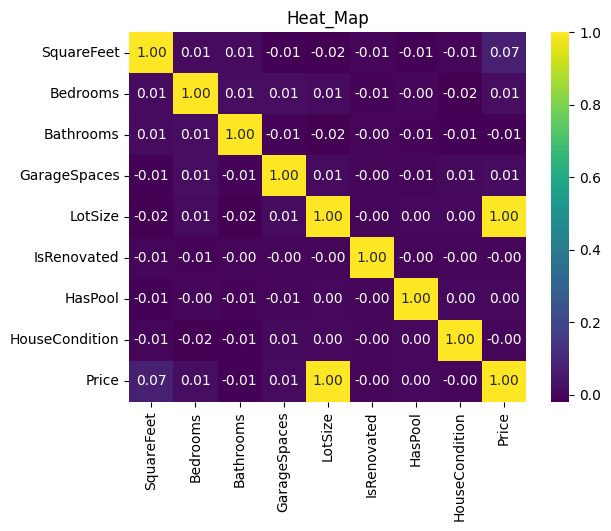

In [14]:
# Correlation_matrix
House_correlation_matrix = house_data_sample.corr()
# Generate_heatmap
sns.heatmap(House_correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heat_Map')
plt.show()

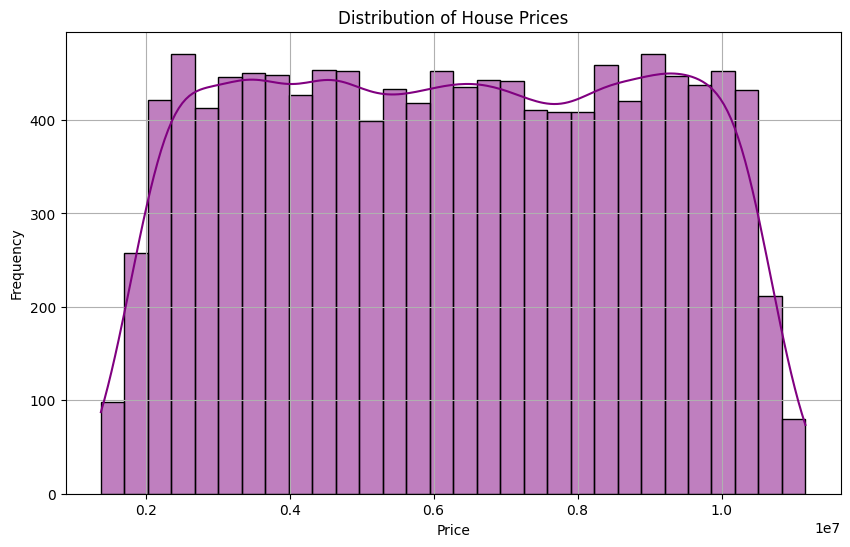

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(house_data_sample['Price'], bins=30, kde=True, color='purple')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


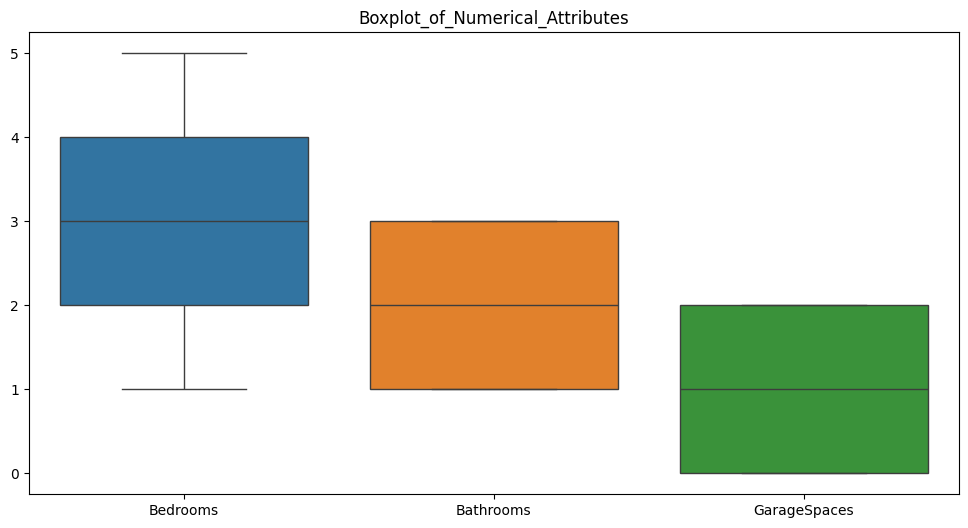

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=house_data_sample[['Bedrooms', 'Bathrooms', 'GarageSpaces']])
plt.title('Boxplot_of_Numerical_Attributes')
plt.show()

Text(0.5, 1.0, 'Distribution_of_Square_Feet')

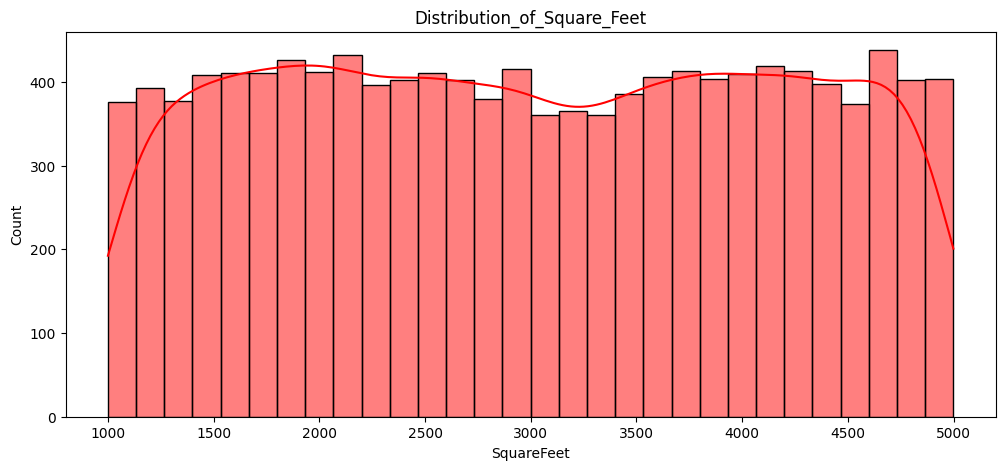

In [17]:
# SquareFeet:_Histogram_and_Scatter_plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
sns.histplot(data=house_data_sample, x='SquareFeet', bins=30, kde=True, color='red')
plt.title('Distribution_of_Square_Feet')
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=house_data_sample, x='SquareFeet', y='Price')
# plt.title('SquareFeet_vs._Price_')
# plt.show()

C:\Users\walee\AppData\Local\Temp\ipykernel_21092\3526861234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=house_data_sample, x='Bathrooms', palette=colors)
C:\Users\walee\AppData\Local\Temp\ipykernel_21092\3526861234.py:5: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.violinplot(data=house_data_sample, x='Bathrooms', palette=colors)


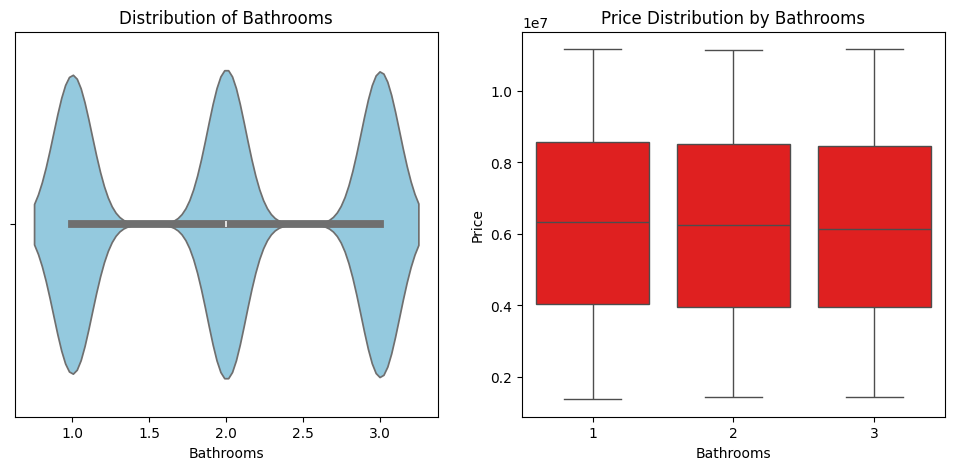

In [18]:
plt.figure(figsize=(12, 5))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']
# Violin plot for the distribution of bathrooms
plt.subplot(1, 2, 1)
sns.violinplot(data=house_data_sample, x='Bathrooms', palette=colors)
plt.title('Distribution of Bathrooms')

plt.subplot(1, 2, 2)
sns.boxplot(data=house_data_sample, x='Bathrooms', y='Price', color='red')
plt.title('Price Distribution by Bathrooms')
plt.show()

C:\Users\walee\AppData\Local\Temp\ipykernel_21092\44009790.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_data_sample, x='Bedrooms', y='Price', palette=new_colors)


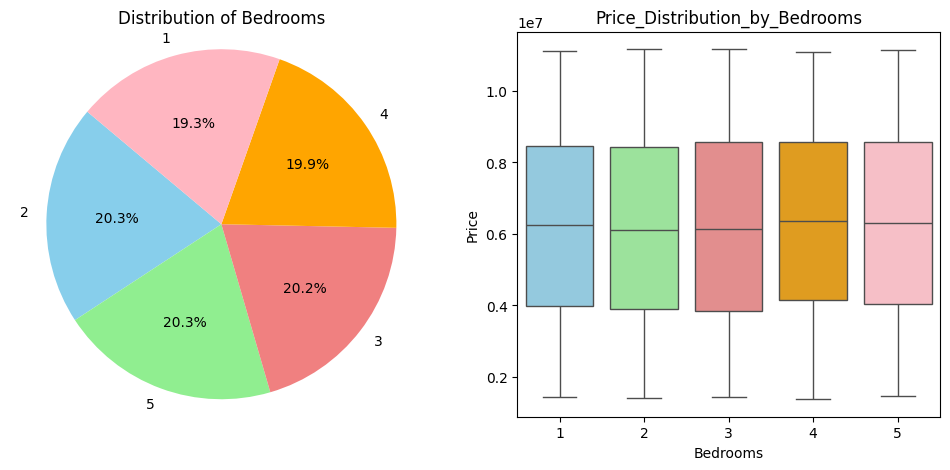

In [19]:
new_colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']


bedroom_counts = house_data_sample['Bedrooms'].value_counts()

plt.figure(figsize=(12, 5))

# Plotting the pie chart
plt.subplot(1, 2, 1)
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=140, colors=new_colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Bedrooms')

plt.subplot(1, 2, 2)
sns.boxplot(data=house_data_sample, x='Bedrooms', y='Price', palette=new_colors)
plt.title('Price_Distribution_by_Bedrooms')
plt.show()

C:\Users\walee\AppData\Local\Temp\ipykernel_21092\4167784959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=house_data_sample, x='GarageSpaces', palette=new_colors)
C:\Users\walee\AppData\Local\Temp\ipykernel_21092\4167784959.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.countplot(data=house_data_sample, x='GarageSpaces', palette=new_colors)
C:\Users\walee\AppData\Local\Temp\ipykernel_21092\4167784959.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_data_sample, x='GarageSpaces', y='Price', palette=new_colors)
C:\Users\walee\AppData\Local\Temp\ipykernel_21092\4167784959.py:16: UserWarning: The 

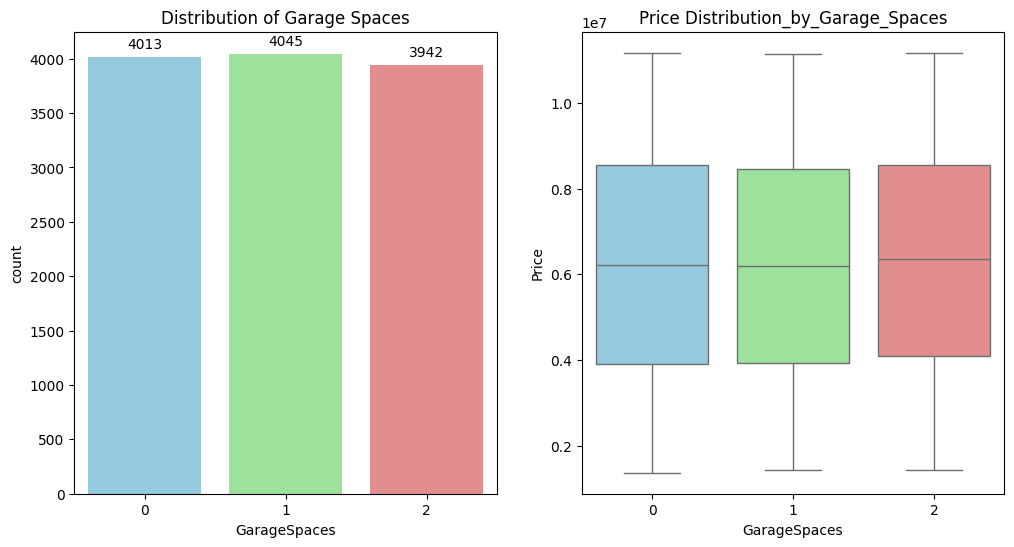

In [20]:
# GarageSpaces:_Count_plot_and_Box_plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=house_data_sample, x='GarageSpaces', palette=new_colors)
plt.title('Distribution of Garage Spaces')

# Adding_count_values_on_top_of_each_bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
# Box_plot_for_Price_Distribution_by_Garage_Spaces
plt.subplot(1, 2, 2)
sns.boxplot(data=house_data_sample, x='GarageSpaces', y='Price', palette=new_colors)
plt.title('Price Distribution_by_Garage_Spaces')
plt.show()

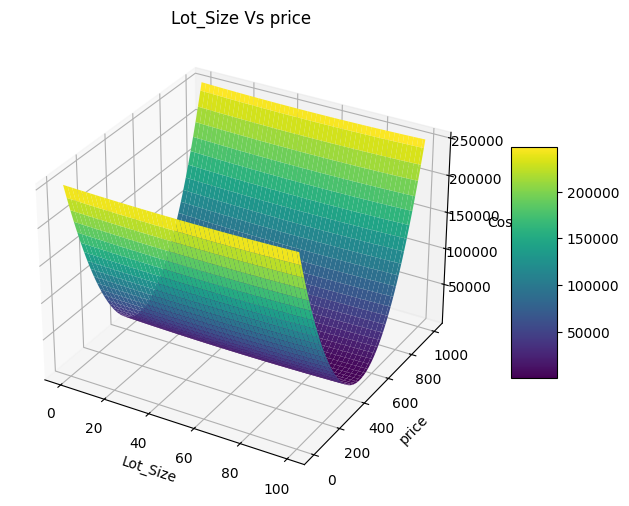

In [21]:
#Data_Sampling_for_LotSize_and_Price
LotSize = np.linspace(0, 100, 100)
Price = np.linspace(0, 1000, 100)
LotSize, Price = np.meshgrid(LotSize, Price)

#convex_cost_function
cost = (LotSize - 50)**2 + (Price - 500)**2

# Plot_the_convex_cost_surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(LotSize, Price, cost, cmap='viridis')

# Set labels and title
ax.set_xlabel('Lot_Size')
ax.set_ylabel('price')
ax.set_zlabel('Cost')
plt.title('Lot_Size Vs price')

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


C:\Users\walee\AppData\Local\Temp\ipykernel_21092\776097610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=house_data_sample, y='HasPool', palette=red_palette_shade)
C:\Users\walee\AppData\Local\Temp\ipykernel_21092\776097610.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_data_sample, x='HasPool', y='Price', palette= red_palette_shade)


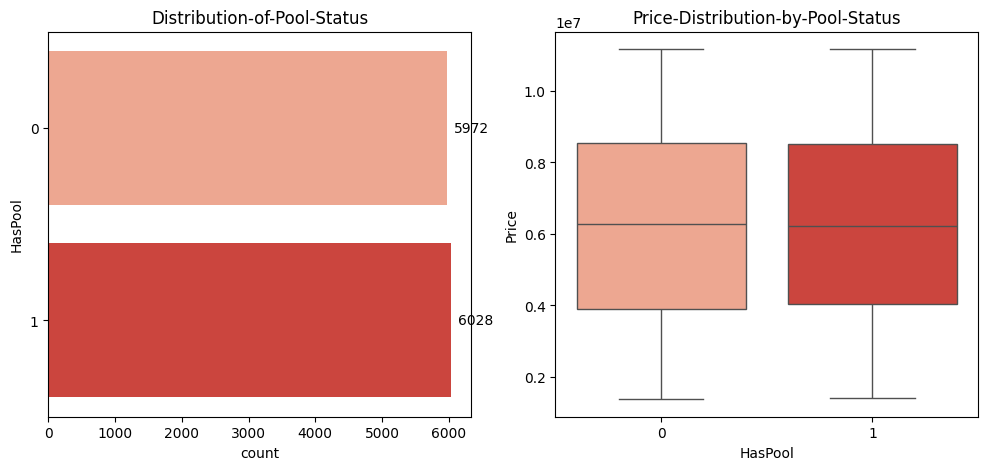

In [22]:
# Red_palette-shades
red_palette_shade = sns.color_palette('Reds', n_colors=2)

plt.figure(figsize=(12, 5))

# Count-plot-for-distribution-of-pool-status
plt.subplot(1, 2, 1)
ax=sns.countplot(data=house_data_sample, y='HasPool', palette=red_palette_shade)
plt.title('Distribution-of-Pool-Status')

# Add_count_values_inside_the_bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')

# Box_plot_for_price_distribution_by_pool_status
plt.subplot(1, 2, 2)
sns.boxplot(data=house_data_sample, x='HasPool', y='Price', palette= red_palette_shade)
plt.title('Price-Distribution-by-Pool-Status')

plt.show()


C:\Users\walee\AppData\Local\Temp\ipykernel_21092\2654800435.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_data_sample, x='HouseCondition', y='Price',palette=colors__)


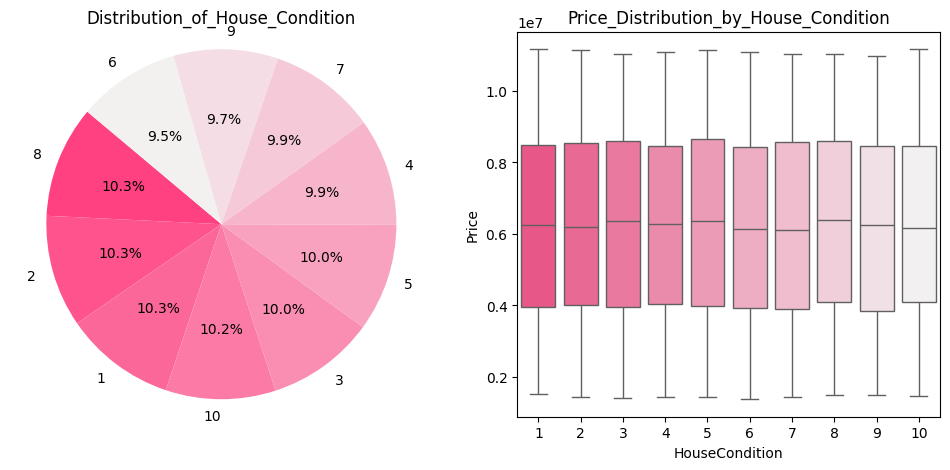

In [23]:
darkpink = "#D81B60"  # Dark_pink
lightpink = "#FF4081"  # Light_pink
house_condition_count = house_data_sample['HouseCondition'].value_counts()
colors__= sns.light_palette(lightpink, n_colors=len(house_condition_count), reverse=True)

house_condition_count = house_data_sample['HouseCondition'].value_counts()
plt.figure(figsize=(12, 5))
# HouseCondition:Count_plot_and_Box_plot
plt.subplot(1, 2, 1)
plt.pie(house_condition_count, labels=house_condition_count.index, autopct='%1.1f%%', startangle=140, colors=colors__)
plt.axis('equal')  # Equal_aspect_ratio_ensures_that_pie_is_drawn_as_a_circle.
plt.title('Distribution_of_House_Condition')

plt.subplot(1, 2, 2)
sns.boxplot(data=house_data_sample, x='HouseCondition', y='Price',palette=colors__)
plt.title('Price_Distribution_by_House_Condition')
plt.show()

# Removing Outliers

In [24]:
# Handling_SquareFeet's_remaining_outliers
square_feet_upper_limit = house_data_sample['SquareFeet'].quantile(0.95)
house_data_cleaned['SquareFeet'] = house_data_cleaned['SquareFeet'].clip(upper=square_feet_upper_limit)

# Managing_the_last_few_outliers_in_the_"Bedrooms"_and_"Bathrooms"
house_data_cleaned = house_data_cleaned[(house_data_cleaned['Bedrooms'] > 0) & (house_data_cleaned['Bedrooms'] <= 5)]
house_data_cleaned = house_data_cleaned[(house_data_cleaned['Bathrooms'] > 0) & (house_data_cleaned['Bathrooms'] <= 4)]


# Model Implimentation
### 1. Random Forest using SK-LEARN
###     (Visualization)
### 2. Random Forest Using LightGBM
###     (Visualization)
### 3. SVR Using Scikit- Learn
###     (Visualization)
### 4. SVR UsingTensorFLow
###     (Visualization)

# Applying RandomForest Using Sk-learn

Random forest Regressor is a supervised learning algorithm which is used for continuous prediction. Random Forest Regressor consist of specific hyperparameters such as the number of trees, max depth and features to consider that are used in optimization which is also called hyperparameter turning. It can handle huge amounts of information like features or attributes to make a prediction.

In [25]:
# Assign_X_variable_and_y_variable
X = house_data_cleaned.drop('Price', axis=1)
y = house_data_cleaned['Price']

In [26]:
# Spliting_dataset_into_training_and_testing
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Set_the_Random_Forest_model_up_and_start_training_it.
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1)
random_forest_model.fit(X_training, y_training)

RandomForestRegressor(n_estimators=50, n_jobs=1, random_state=42)

In [28]:
# predictions_on_y_variable
y_predict = random_forest_model.predict(X_testing)

In [29]:
# Analyzing_the_model
mse = mean_squared_error(y_testing, y_predict)
r2 = r2_score(y_testing, y_predict)*100
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testing, y_predict)

In [30]:
# Results
print(f'R-squared Score: {r2}%')
print(f'mean_squared_error:',mse)
print(f'Mean_Absolute_Error: ', mae)
print(f'Root_Mean_Squared_Error: ', rmse)

R-squared Score: 99.94683980284474%
mean_squared_error: 3536553629.1222267
Mean_Absolute_Error:  47158.93747224683
Root_Mean_Squared_Error:  59468.92994768131


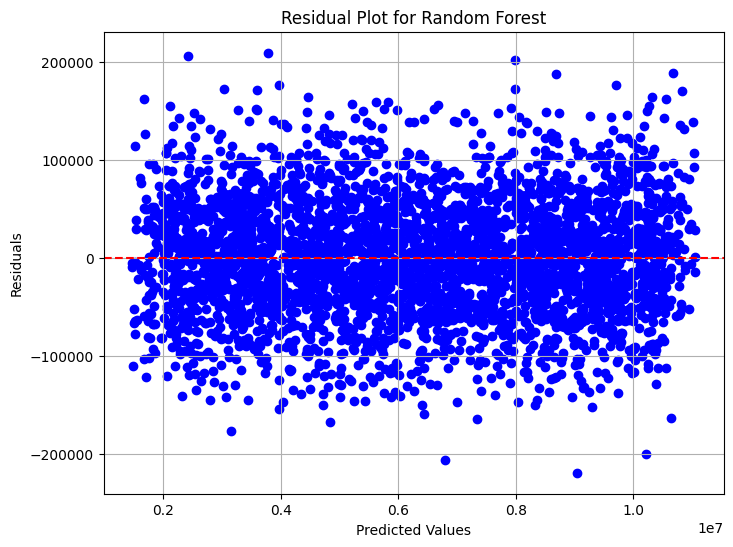

In [31]:
residuals = y_testing - y_predict
# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.grid(True)
plt.show()

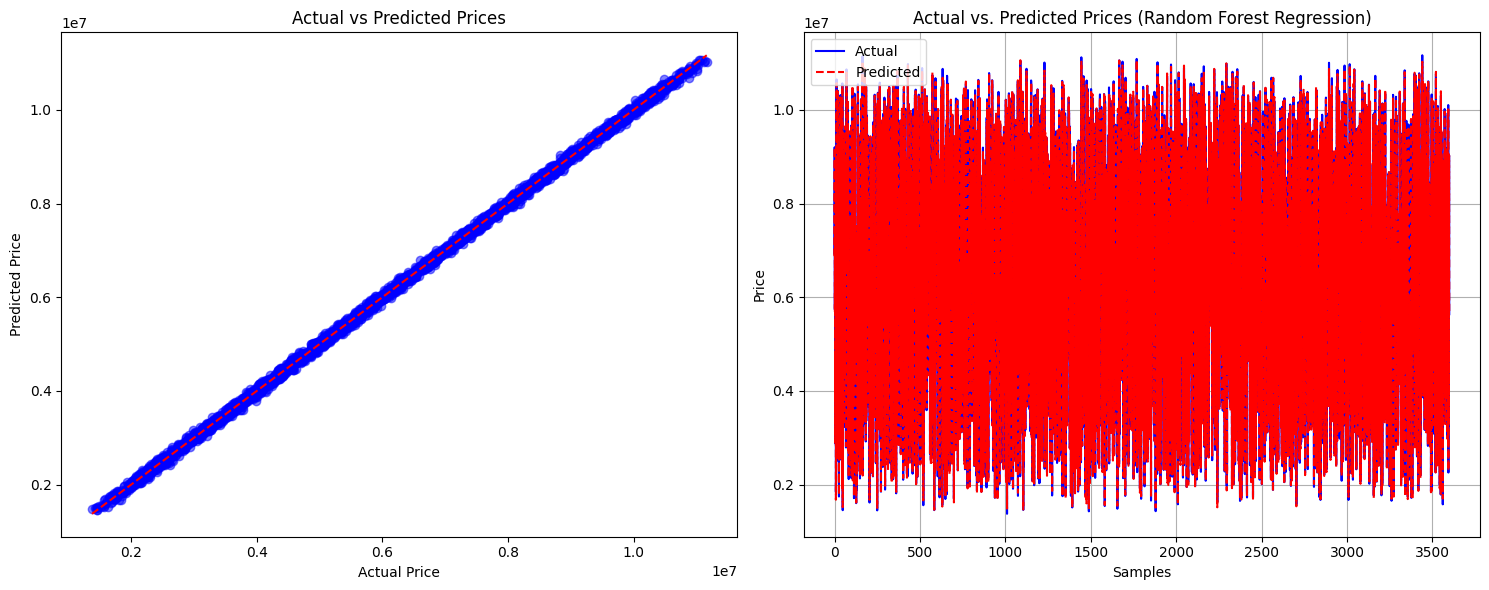

In [32]:
plt.figure(figsize=(15, 6))

# Scatter plot for Actual vs Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_testing, y_predict, color='blue', alpha=0.5)
plt.plot([min(y_testing), max(y_testing)], [min(y_testing), max(y_testing)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Line plot for Actual and Predicted Prices
plt.subplot(1, 2, 2)
y_test = y_testing.reset_index(drop=True)
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_predict, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (Random Forest Regression)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Applying random Forest Using LightGBM 
LightGBM regressor is a fast and efficient algorithm for the prediction of continuous values for large datasets.By using gradient boosting, LightGBM accumulates many weak models into a strong predictor.It utilises categorical values directly without converting them into numerical values, also it doesn't need one-hot encoding or another preprocessing steps.

In [33]:
# Spliting_datasets_into_training_and_testing
train, test = train_test_split(house_data_cleaned, test_size=0.3, random_state=1234)

In [34]:
# specify_the_features_of_X_and_the_target_variable_y
X_train = train[['SquareFeet','Bedrooms','Bathrooms','GarageSpaces','LotSize','IsRenovated','HasPool','HouseCondition']]
y_train = train["Price"]
X_test = test[['SquareFeet','Bedrooms','Bathrooms','GarageSpaces','LotSize','IsRenovated','HasPool','HouseCondition']]
y_test = test["Price"]


In [35]:
# Form_LightGBM_dataset
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 20,  
    'learning_rate': 0.1,  
    'feature_fraction': 0.7,  
    'bagging_fraction': 0.7,  
    'bagging_freq': 5,
    'verbose': 0,
    'lambda_l1': 0.5,  
    'lambda_l2': 0.5,  
}

In [36]:
# Retrain_using_modified_parameters.
lgb_model = lgb.train(params, train_data)

In [37]:
# Make_predictions_&_evaluate_again
y_pred = lgb_model.predict(X_test)

In [38]:
# Analyzing_the_model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


In [39]:
# Results
print("Mean Squared Error:", mse)
print(f"R2: {r2}")
print('Mean_Absolute_Error: ', mae)
print('Root_Mean_Squared_Error: ', rmse)

Mean Squared Error: 4315478034.622673
R2: 0.9993597585017806
Mean_Absolute_Error:  52212.473888247245
Root_Mean_Squared_Error:  65692.29813777772


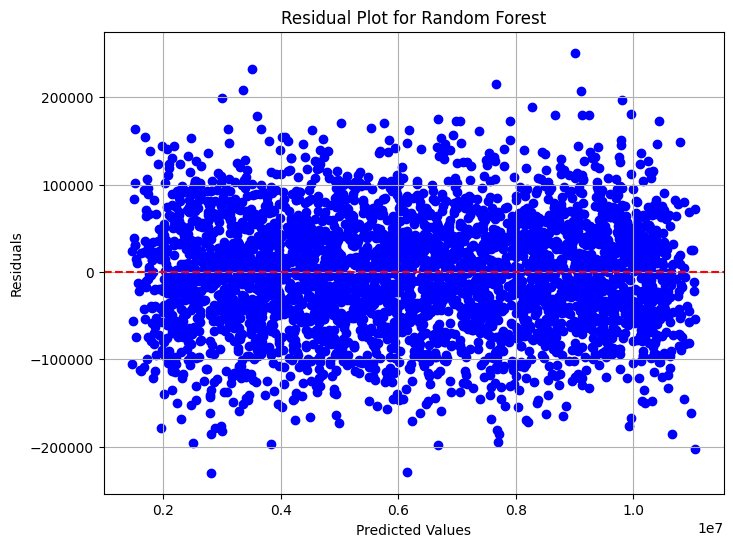

In [40]:
residuals = y_test - y_pred
# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.grid(True)
plt.show()

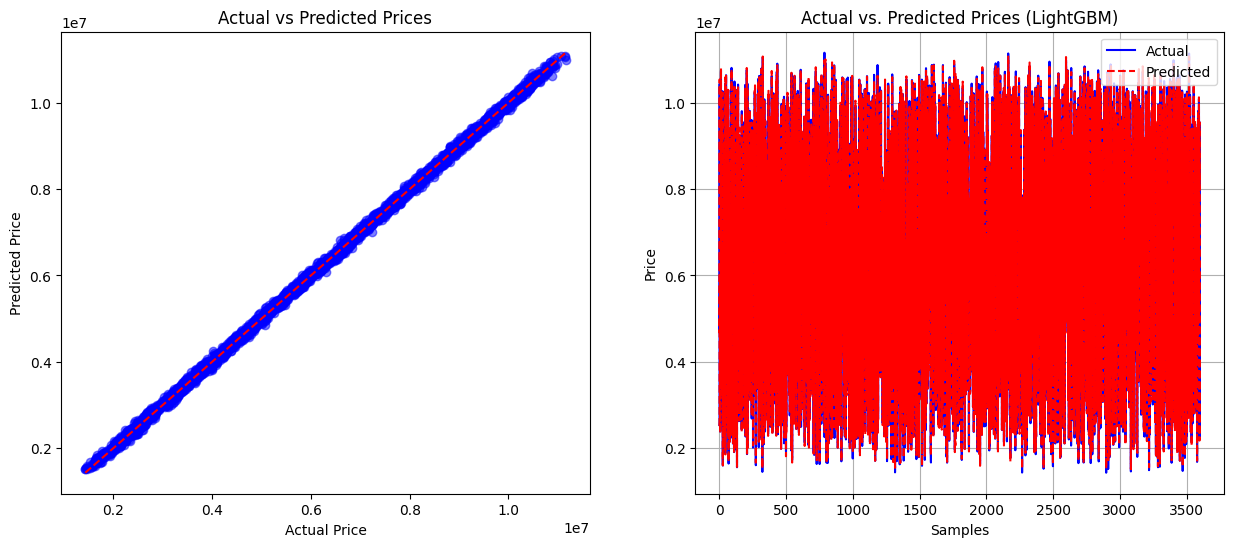

In [41]:
plt.figure(figsize=(15, 6))

# Scatter plot for Actual vs Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


# Line plot for Actual and Predicted Prices
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (LightGBM)')
plt.legend()
plt.grid(True)




 # Applying SVR Using Scikit- Learn
SVR implementation through Scikit Learn provides efficient performance and is easy to implement. It allows programmers to designate certain parameters like kernel type, regularisation of parameters, and kernel coefficient.Epsilon, which is a parameter in support vector machine regressor. It determines a margin of relief where no retribution is given to errors.By using the kernel function, SVR to find out the data input attributes into a higher-dimensional space.

In [42]:
# Prepare_the_data
X = house_data_cleaned.drop('Price', axis=1)
y = house_data_cleaned['Price']

In [43]:
# Splitting_datasets_into_training_and_testing
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# feature_scaling
scaler = StandardScaler()
X_training_scalling = scaler.fit_transform(X_train)
X_testing_scalling = scaler.transform(X_test)


In [45]:
# Modelling_Training
svr_model = SVR(kernel='rbf', C=4500, gamma='auto')
svr_model.fit(X_training_scalling, y_train)


SVR(C=4500, gamma='auto')

In [46]:
# predictions_on_the_test_set
y_pred_svm = svr_model.predict(X_testing_scalling)

In [47]:
# Analyze_the_model
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm)

In [48]:
# results
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Mean_Absolute_Error: , {mae}')
print(f'Root_Mean_Squared_Error: , {rmse}')

Mean Squared Error: 1894488250995.39
R-squared Score: 0.7189349623737927
Mean_Absolute_Error: , 1138453.5272946495
Root_Mean_Squared_Error: , 1376404.1016341785


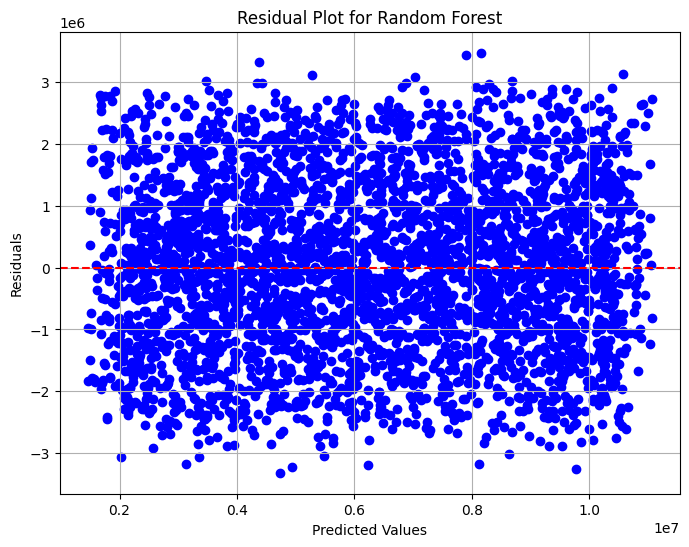

In [49]:
residuals = y_test - y_pred_svm
# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.grid(True)
plt.show()

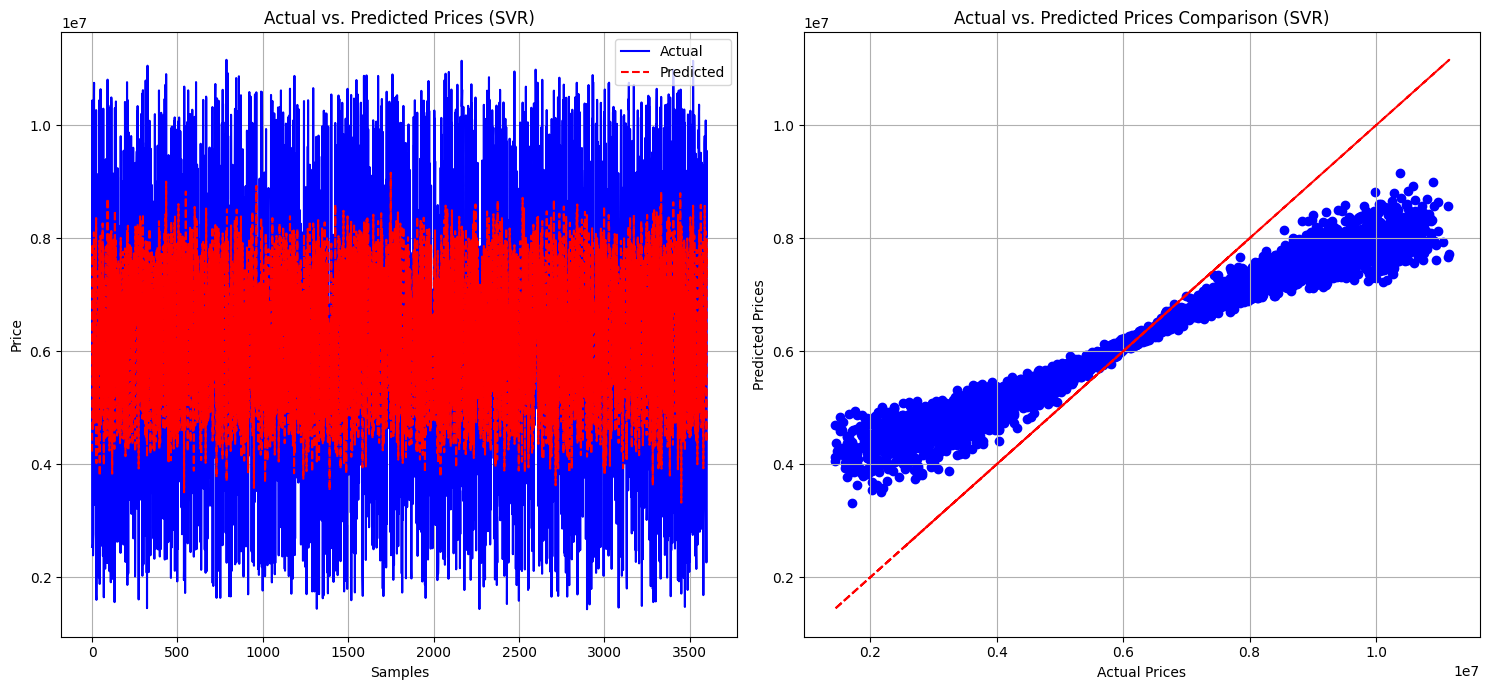

In [50]:
y_test_reset = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 7))

# Line plot for Actual vs Predicted Prices
plt.subplot(1, 2, 1)
plt.plot(y_test_reset, label='Actual', color='blue')
plt.plot(y_pred_svm, label='Predicted', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (SVR)')
plt.legend()
plt.grid(True)

# Scatter plot for Actual vs Predicted Prices
plt.subplot(1, 2, 2)
plt.scatter(y_test_reset, y_pred_svm, color='blue')
plt.plot(y_test_reset, y_test_reset, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices Comparison (SVR)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Applying SVR UsingTensorFLow
TensorFlow is a powerful machine-learning library which is widely known for its Neural Network implementation. It offers powerful capabilities for implementing SVR models.Tensorflow provides great tonsillitis and flexibility in model customization as compared to scikit learn.Tensorflow instantly integrates with Neural network architecture. It could combine SVR with neural networks in TensorFlow to build hybrid models.

In [51]:
#Load_Dataset
df2= house_data_cleaned

In [52]:
#The_preprocessing_of_house_data_cleaned_is_appropriate.
X_independent =  house_data_cleaned.drop(columns=['Price']).values
y_dependent =  house_data_cleaned['Price'].values

In [53]:
# Simplify_by_converting_labels_to_0_or_1_depending_on_the_median
y_dependent = np.where(y_dependent <= np.median(y_dependent), 0, 1)

In [54]:
# Split_the_dataset
X_training, X_testing, y_training, y_testing = train_test_split(X_independent, y_dependent, test_size=0.2, random_state=42)

In [55]:
# Scale_features
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

In [56]:
# Define_the_SVR_model_using_TensorFlow
svr_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_training_scaled.shape[1],)),  # Input layer with shape as a tuple
    tf.keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

In [57]:
# Compile_the_model_with_mean_squared_error_loss_and_mean_absolute_error_metric
svr_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [58]:
# Training_the_model
history_ = svr_model.fit(X_training_scaled, y_training, epochs=10, validation_split=0.2)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7946 - mae: 1.0886 - val_loss: 0.8928 - val_mae: 0.7588
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7726 - mae: 0.7150 - val_loss: 0.3736 - val_mae: 0.4937
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3255 - mae: 0.4603 - val_loss: 0.1653 - val_mae: 0.3304
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1457 - mae: 0.3071 - val_loss: 0.0921 - val_mae: 0.2481
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0880 - mae: 0.2417 - val_loss: 0.0699 - val_mae: 0.2189
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0672 - mae: 0.2126 - val_loss: 0.0639 - val_mae: 0.2106
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0629 - mae: 0.2074 - val_loss: 0.0626 - val_mae: 0.2085
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0626 - mae: 0.2077 - val_loss: 0.0624 - val_mae: 0.2079
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [59]:
# Evaluate_the_svr_model
y_predicting = svr_model.predict(X_testing_scaled)
testing_loss, testing_mae = svr_model.evaluate(X_testing_scaled, y_testing)
testing_rmse = np.sqrt(mean_squared_error(y_testing, y_predicting))


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0649 - mae: 0.2105


In [60]:
r2 = r2_score(y_testing, y_predicting)*100
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testing, y_predicting)
mse = mean_squared_error(y_testing, y_predicting)

In [61]:
print(f'Testing_Loss: {testing_loss}')
print(f'Testing_MAE: {testing_mae}')
print(f'R2_Score: {r2}')
print(f'Testing_RMSE: {testing_rmse}')

Testing_Loss: 0.06391028314828873
Testing_MAE: 0.21001332998275757
R2_Score: 74.43288933446448
Testing_RMSE: 0.2528048164148574


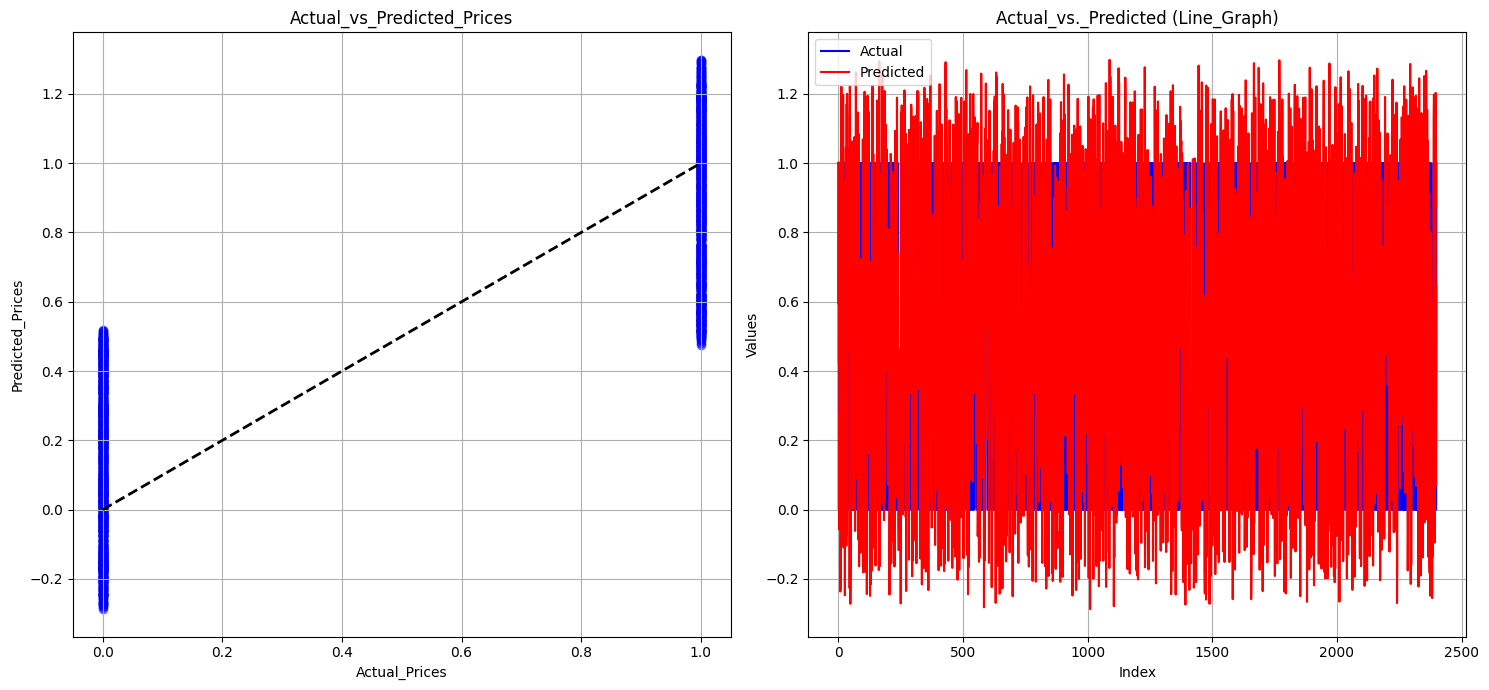

In [62]:
plt.figure(figsize=(15, 7))
# Scatter_plot
plt.subplot(1, 2, 1)

plt.scatter(y_testing, y_predicting, color='blue', alpha=0.5)
plt.plot([y_testing.min(), y_testing.max()], [y_testing.min(), y_testing.max()], 'k--', lw=2)
plt.xlabel('Actual_Prices')
plt.ylabel('Predicted_Prices')
plt.title('Actual_vs_Predicted_Prices')
plt.grid(True)


# Line_graph
plt.subplot(1, 2, 2)

plt.plot(y_testing, color='blue', label='Actual')
plt.plot(y_predicting, color='red', label='Predicted')
plt.title('Actual_vs._Predicted (Line_Graph)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

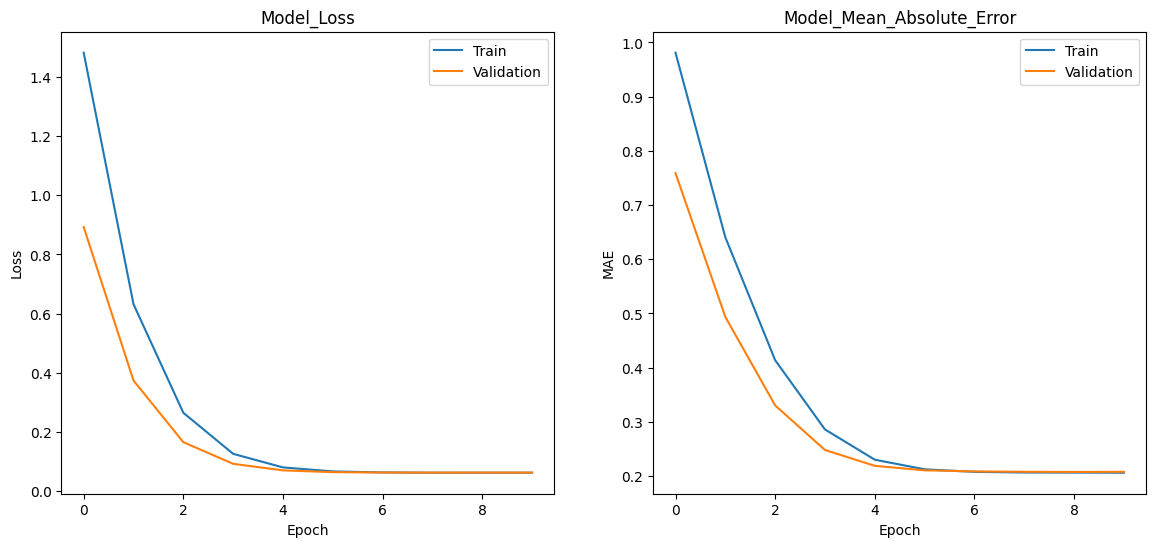

In [63]:
# Plot_training_&_validation_loss_values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot_training_&_validation_MAE_values
plt.subplot(1, 2, 2)
plt.plot(history_.history['mae'])
plt.plot(history_.history['val_mae'])
plt.title('Model_Mean_Absolute_Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
